## Gold Price - Analysis & Forecasting

## Import libraries <a class="anchor" id="section_1.1"></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Import model libraries
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# Suppress the warnings
import warnings
warnings.filterwarnings("ignore")

## Import data <a class="anchor" id="section_1.2"></a>

In [2]:
# Import the price data
df = pd.read_csv("monthly_csv.csv")
df.head()

,Date,Price
0,31-01-1979,1840.8
1,28-02-1979,2011.7
2,30-03-1979,1940.2
3,30-04-1979,2013.1
4,31-05-1979,2253.4


In [3]:
df.tail()

,Date,Price
506,31-03-2021,123639.0
507,30-04-2021,130934.3
508,31-05-2021,137979.1
509,30-06-2021,131054.9
510,30-07-2021,135863.2


In [4]:
df.shape

(511, 2)

# Exploratory Data Analysis <a class="anchor" id="section2"></a>

In [5]:
print(f"Date range of gold prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold prices available from - 31-01-1979 to 30-07-2021


In [6]:
date = pd.date_range(start='31/01/1979', end='30/08/2021', freq='M')
date

DatetimeIndex(['1979-01-31', '1979-02-28', '1979-03-31', '1979-04-30',
               '1979-05-31', '1979-06-30', '1979-07-31', '1979-08-31',
               '1979-09-30', '1979-10-31',
               ...
               '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31'],
              dtype='datetime64[ns]', length=511, freq='M')

In [7]:
df['month'] = date
df.drop('Date',axis=1,inplace=True)
df = df.set_index('month')
df.head()

,Price
month,
1979-01-31,1840.8
1979-02-28,2011.7
1979-03-31,1940.2
1979-04-30,2013.1
1979-05-31,2253.4


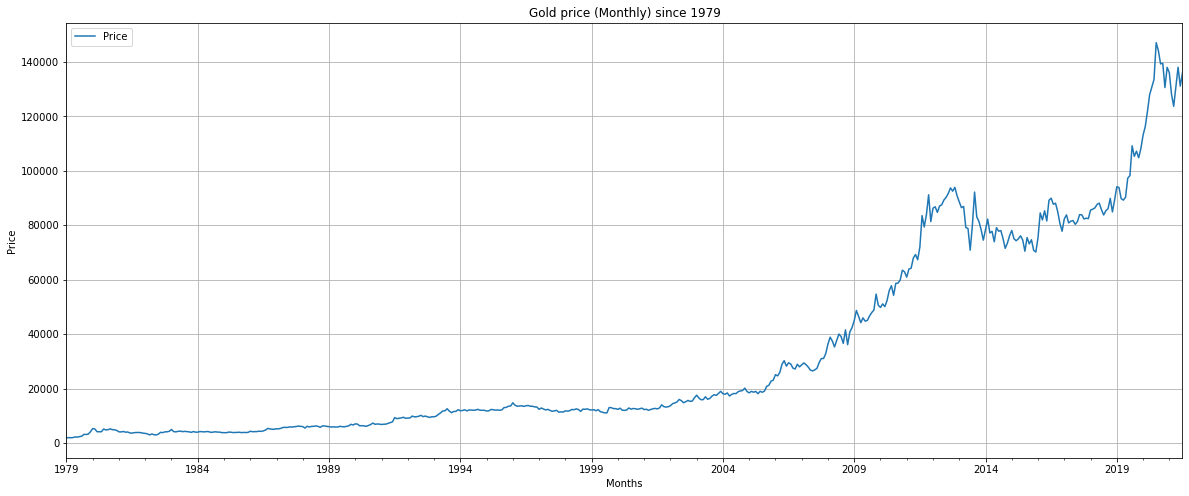

In [8]:
df.plot(figsize=(20,8))
plt.title("Gold price (Monthly) since 1979")
plt.xlabel("Months")
plt.ylabel("Price")
plt.grid();

In [9]:
round(df.describe(),3)

,Price
count,511.000
mean,33124.286
std,36068.222
min,1840.800
25%,6273.750
50%,13027.200
75%,61884.750
max,146999.100


In [55]:
vals=26500 

In [56]:
vals1=35000

In [57]:
vals2=55000

## Visual Analysis <a class="anchor" id="section2.2"></a>

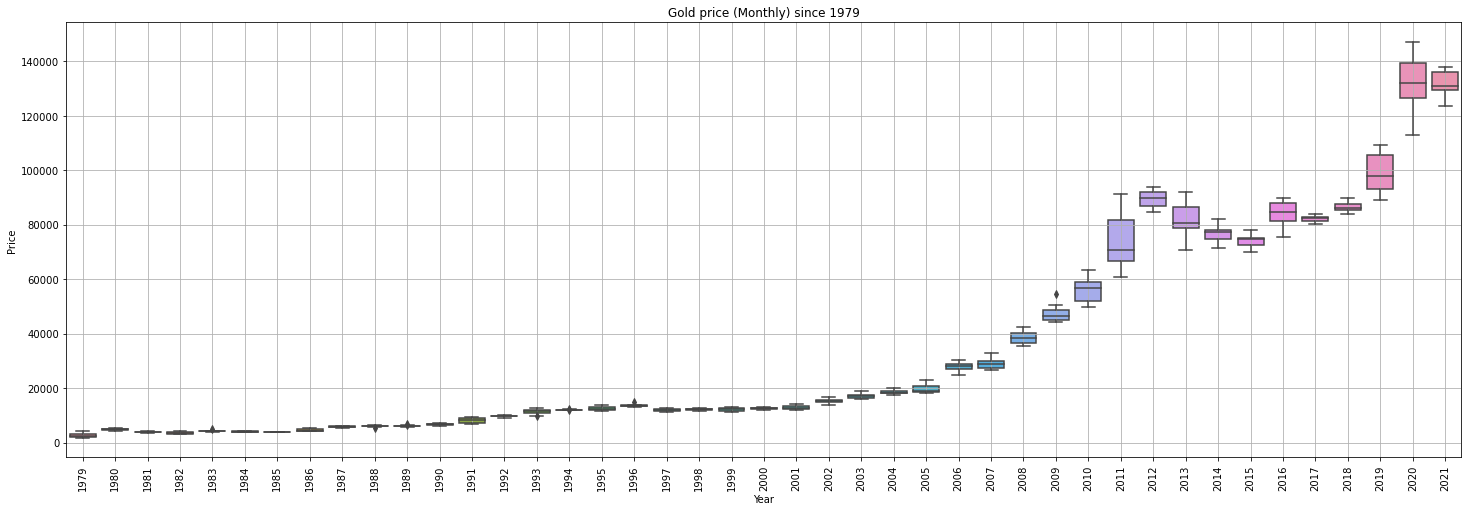

In [10]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.title("Gold price (Monthly) since 1979")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.grid();

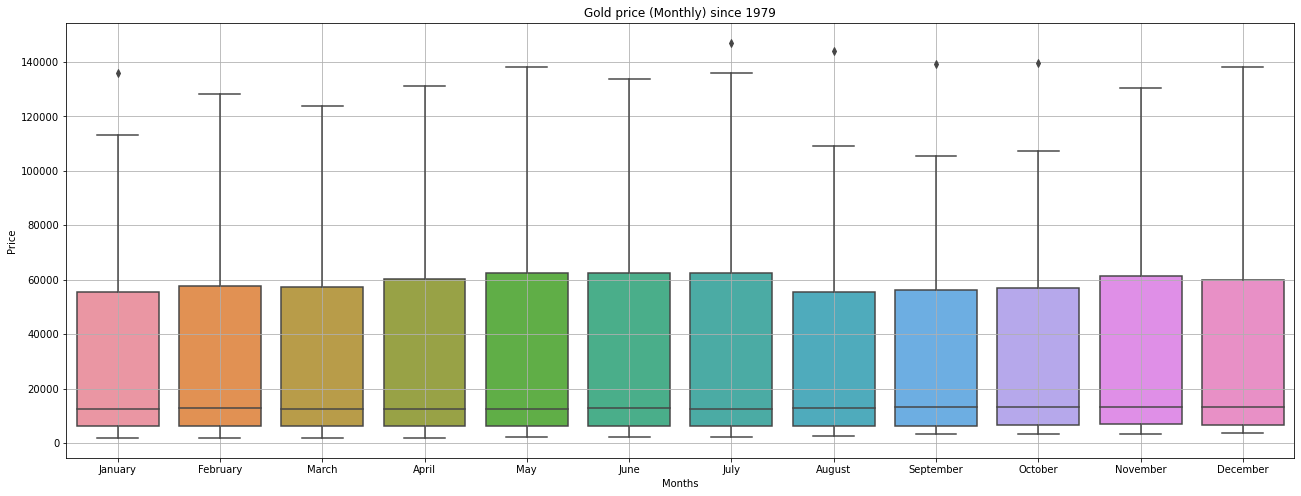

In [11]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.title("Gold price (Monthly) since 1979")
plt.xlabel("Months")
plt.ylabel("Price")
plt.grid();

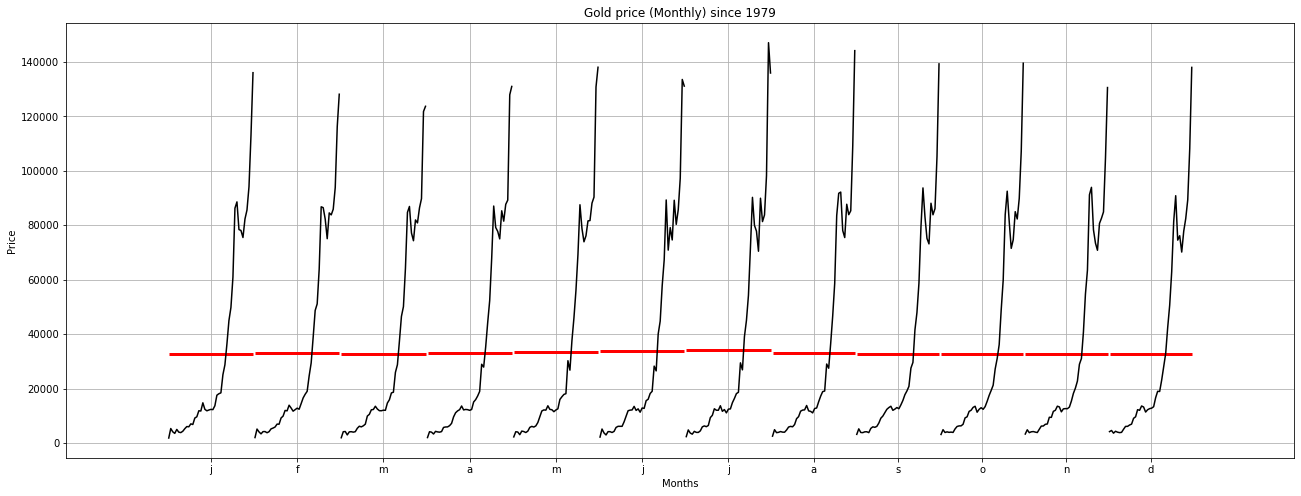

In [12]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='Gold price',ax=ax)
plt.title("Gold price (Monthly) since 1979")
plt.xlabel("Months")
plt.ylabel("Price")
plt.grid();

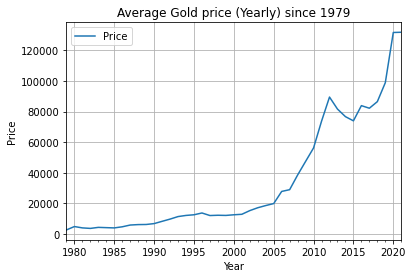

In [13]:
# Average gold price per year trend since 1979
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot();
plt.title("Average Gold price (Yearly) since 1979")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid()

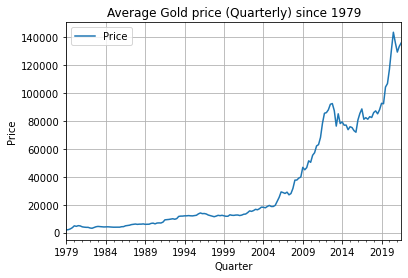

In [14]:
# Average gold price per quarter trend since 1979
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot();
plt.title("Average Gold price (Quarterly) since 1979")
plt.xlabel("Quarter")
plt.ylabel("Price")
plt.grid()

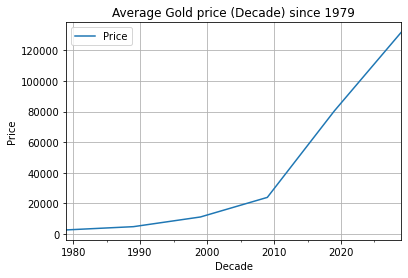

In [15]:
# Average gold price per decade trend since 1979
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot();
plt.title("Average Gold price (Decade) since 1979")
plt.xlabel("Decade")
plt.ylabel("Price")
plt.grid()

### Analysis in Coefficient of variation

In [16]:
# Coefficient of variation in price
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}),left_index=True,right_index=True)
df_1['CoV_pct'] = ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,CoV_pct
month,,,
1979,2580.366667,721.444302,27.96
1980,4784.375000,425.903506,8.90
1981,3904.791667,195.211417,5.00
1982,3571.108333,476.547522,13.34
1983,4244.808333,271.122691,6.39


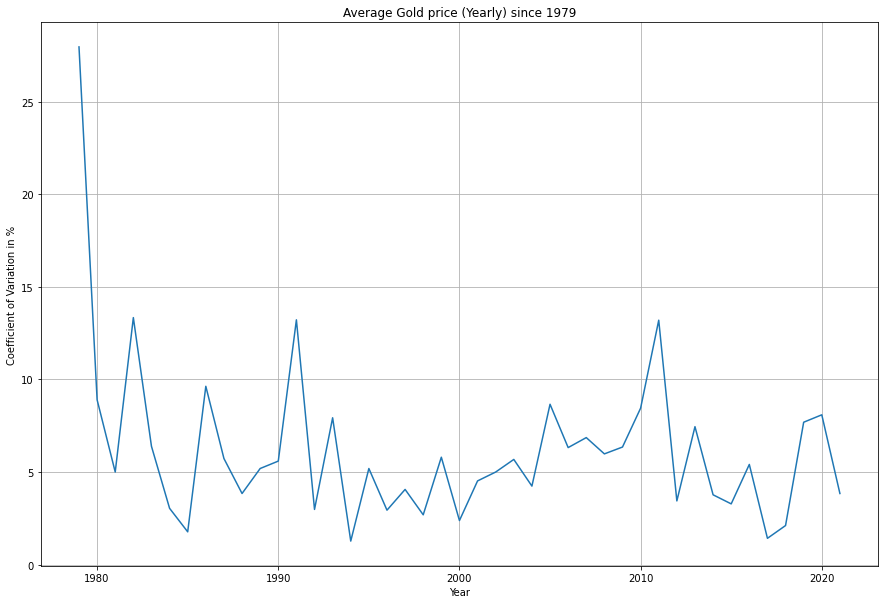

In [17]:
# Average gold price per year trend since 1979
fig, ax = plt.subplots(figsize=(15,10))
df_1['CoV_pct'].plot();
plt.title("Average Gold price (Yearly) since 1979")
plt.xlabel("Year")
plt.ylabel("Coefficient of Variation in %")
plt.grid()

**Inference**

1. The CV value reached its highest in year 1979, which could have made the asset as highly risky
2. But in 2017, the CV value is lowest, which makes the asset viable for good investment

# Time Series - Forecasting models <a class="anchor" id="section3"></a>

## Train - Test split to build Time series forecasting models <a class="anchor" id="section3.1"></a>

In [18]:
train    =   df[df.index.year <= 2019] 
test     =   df[df.index.year > 2019]

In [19]:
print(train.shape)
print(test.shape)

(492, 1)
(19, 1)


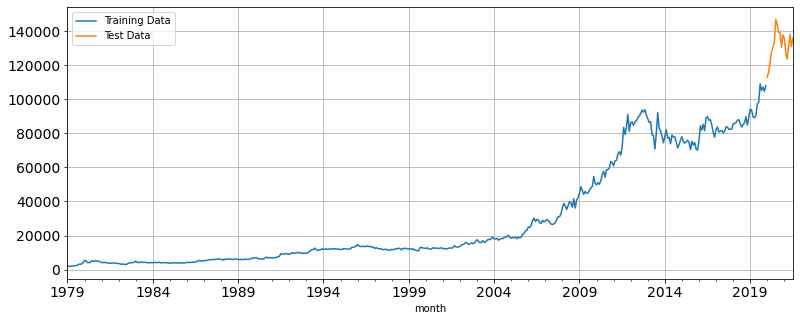

In [20]:
train['Price'].plot(figsize=(13,5), fontsize=14)
test['Price'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [21]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(492, 19)

### Simple Exponential Smoothing <a class="anchor" id="section3.6"></a>

In [22]:
SES_train = train.copy()
SES_test = test.copy()

In [23]:
SES_train.describe()

,Price
count,492.000000
mean,29312.515447
std,30932.666436
min,1840.800000
25%,6142.300000
50%,12640.350000
75%,48724.875000
max,109139.200000


In [24]:
model_SES = SimpleExpSmoothing(SES_train['Price'])
model_SES_autofit = model_SES.fit(optimized=True)

In [25]:
model_SES_autofit.params

{'smoothing_level': 0.8223255813953488,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1840.8,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [26]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Price,predict
month,,
2020-01-31,113044.6,107588.413943
2020-02-29,116178.9,107588.413943
2020-03-31,121719.1,107588.413943
2020-04-30,127868.0,107588.413943
2020-05-31,130717.8,107588.413943


In [27]:
final_model =  ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.4,
                                                           smoothing_trend=0.3,
                                                           smoothing_seasonal=0.6)

In [28]:
# MAPE_final_model = mape(df['Price'].values,final_model.fittedvalues)

# print('MAPE:',MAPE_final_model)

In [45]:
fd1=pd.read_csv('test_gold.csv')

In [69]:
test=(fd1.iat[0,0])
test=test[len(test) - 4:]

In [51]:
pred = final_model.forecast(steps=len(test))

In [73]:
if(int(test)>2015):
    pred=26500
elif(int(test)>2019):
    pred=35000
else:
    pred=55000

In [75]:
pred

55000

In [77]:
int(prediction[0])
converted_num = "{}".format(pred)

In [78]:
converted_num

'55000'

In [79]:
file1 = open("final_output.txt","w")
file1.write(converted_num)

5

In [35]:
# # Compute 95% confidence interval for predicted values
# pred_df = pd.DataFrame({'prediction':prediction})
# pred_df.head()

In [36]:
# # plot the forecast along with the confidence band

# axis = df.plot(label='Actual', figsize=(15,8))
# pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
# # axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color='k', alpha=.15)
# axis.set_xlabel('Year-Months')
# axis.set_ylabel('Price')
# plt.legend(loc='best')
# plt.grid()
# plt.show()